# OFCOM Survey Data Cleaning and Preprocessing
## 1. Import necessary libraries & modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import re

## 2. Load the data to dataframes
### Getting a list of files

In [2]:
path_for_ofcom_datasets = '1_api_connectors_and_csv_parsers/2_processed_databases/ofcom_data'

directory_path = Path(path_for_ofcom_datasets)

file_list = [f.name for f in directory_path.iterdir() if f.is_file()]

csv_filepaths = [f'{path_for_ofcom_datasets}/{file}' for file in file_list if file[-3:] == 'csv']

### Reviewing the files and deciding which questions are suitable for our data analysis

In [3]:
file_list

['to_which_of_the_following_religious_groups_do_you_consider_yourself_to_be_a_member_of.csv',
 'q5_trust_in_the_sources_for_informationnews_about_coronavirus_used_in_last_week_channel_4.csv',
 'q13_how_closely_followed_official_advice_in_last_week_wearing_a_face_maskcovering_where_relevant.csv',
 'q5_trust_in_the_sources_for_informationnews_about_coronavirus_used_in_last_week_broadsheets_such_as_the_times_or_guardian__online_.csv',
 'which_of_the_following_best_describes_where_you_live.csv',
 'q4a_types_of_newsinformation_seen_on_social_media_and_search_engines_in_last_week_whatsapp_groups.csv',
 'q13_how_closely_followed_official_advice_in_last_week_only_meeting_outside_with_up_to_six_people_from_any_number_of_households_or_any_number_of_people_from_two_households.csv',
 'q13b_which_of_the_following_official_advice_do_you_think_are_the_most_important_to_do_to_contain_the_coronavirus_staying_at_home_as_much_as_possible.csv',
 'q5_trust_in_the_sources_for_informationnews_about_coronavir

### My selection from the above based on our research question:

In [4]:
list_of_parameters_for_exploration = [
"q1_device_usage_to_connect_to_internet",
"q2_frequency_of_getting_infonews_about_coronavirus_outbreak_in_last_week",
"q3a_sources_used_to_get_infonews_about_coronavirus_outbreak_in_last_week",
"q3b_most_important_source_used_in_last_week",
"q4a_types_of_newsinformation_seen_on_social_media_and_search_engines_in_last_week",
"q4b_most_important_type_of_newsinformation_from_social_media_or_search_engines",
"q4b3_to_what_extent_do_you_agree_or_disagree_with_the_following_statements",
"q5_trust_in_the_sources_for_informationnews_about_coronavirus_used_in_last_week",
"q6_altered_behaviour_over_last_week",
"q7_ways_of_sharing_informationnews_in_last_week",
"q7b_why_did_you_share_this_informationnews_about_coronavirus",
"q8_whether_came_across_informationnews_about_coronavirus_that_you_think_has_been_false_or_misleading_in_last_week",
"'q10_whether_came_across_any_of_these_false_or_misleading_information_about_avoiding_the_coronavirus_in_the_last_week",
"q10_whether_came_across_any_of_these_false_or_misleading_recommendations_about_avoiding_the_coronavirus_in_the_last_week",
"q10b_how_theory_that_the_origin_or_cause_of_coronavirus_is_in_some_way_linked_to_5g_technology_has_been_reported",
 "q10c_source_of_theory_linking_coronavirus_to_5g_technology_reported_as_true",
 "q10d_how_claims_about_the_potential_dangers_associated_with_coronavirus_vaccine_have_been_reported",
 "q10d_how_claims_about_the_potential_dangers_of_a_coronavirus_vaccine_have_been_reported",
 "q10e_source_of_claims_about_the_potential_dangers_associated_with_coronavirus_vaccine_reported_as_true",
 "q10e_source_of_claims_about_the_potential_dangers_of_a_coronavirus_vaccine_reported_as_true",
 "q10f_how_claims_about_injecting_disinfectant_have_been_reported",
 "q10g_source_of_claims_about_about_injecting_disinfectant_as_true",
 "q10h_how_claims_about_face_maskscoverings_offering_no_protection_or_being_harmful_have_been_reported",
 "q10h_how_claims_about_masks_offering_no_protection_or_being_harmful_have_been_reported",
 "q10i_source_of_claims_about_about_face_maskscoverings_offering_no_protection_or_being_harmful__as_true",
 "q10i_source_of_claims_about_about_masks_offering_no_protection_or_being_harmful__as_true",
 "q10k_to_what_extent_are_you_concerned_or_not_concerned_about_the_following_statements__summary",
 "q10k_to_what_extent_are_you_concerned_or_not_concerned_about_the_following_statements__the_amount_of_false_or_misleading_information_that_others_in_society_may_be_getting_about_coronavirus",
 "q10k_to_what_extent_are_you_concerned_or_not_concerned_about_the_following_statements__the_amount_of_false_or_misleading_information_you_may_be_getting_about_coronavirus",
 "q10l_how_claims_about_the_coronavirus_test_which_shows_if_you_currently_have_the_virus_does_not_work_and_93_of_tests_produce_a_false_positive_have_been_reported",
 "q10m_source_of_claims_about_the_coronavirus_test_which_shows_if_you_currently_have_the_virus_does_not_work_and_93_of_tests_produce_a_false_positive_as_true",
 "q10n_how_claims_stating_that_the_flu_alone_is_killing_more_people_than_coronavirus_have_been_reported",
 "q10o_source_of_claims_stating_that_the_flu_alone_is_killing_more_people_than_coronavirus_as_true",
 "q10p_how_claims_about_empty_hospitals_on_social_media_posts_prove_that_coronavirus_has_been_exaggerated_have_been_reported",
 "q10q_source_of_claims_about_empty_hospitals_on_social_media_posts_prove_that_coronavirus_has_been_exaggerated_reported_as_true",
 "q10r_how_claims_that_the_coronavirus_vaccine_is_a_cover_for_a_plan_to_implant_trackable_microchips_in_people_have_been_reported",
 "q10s_source_of_claims_that_the_coronavirus_vaccine_is_a_cover_for_a_plan_to_implant_trackable_microchips_in_people_reported_as_true",
 "q10t_how_claims_that_the_coronavirus_vaccine_may_reduce_fertility_have_been_reported",
    "q12_to_what_extent_do_you_agree_or_disagree_with_the_following_statements_i_would_agree_to_be_vaccinated_against_the_coronavirus_if_there_was_a_vaccine_approved_by_the"
]


In [5]:
ofcom_dataframes = {}
for i, parameter in enumerate(list_of_parameters_for_exploration):
    for file in csv_filepaths:
        if list_of_parameters_for_exploration[i] in file:
            df_for_cleaning = pd.read_csv(file)
            ofcom_dataframes[list_of_parameters_for_exploration[i]] = df_for_cleaning

## 3. Exploring and Understanding the Data
### As there are many dataframes for these questions I go through them in a loop and determine if any can be combined to answer my question and what we need to address in the data

In [6]:
# for dataframe in ofcom_dataframes.values():
#     print("Research Question: /n", dataframe.question[0])
#     print("Shape: ", dataframe.shape)
#     print("Head: /n", dataframe.head())
#     print("Tail: /n", dataframe.tail())
#     print("Info: /n", dataframe.info())

#### From reviewing the data I note several inconsistencies mainly the date columns are duplicated in a few sets (some of the data lists 25-35 (e) whilst others list 25-34 (f) - this is the same for all age ranges. I want to remove the letter naming convention. I also want to change the column names to something I will understand for the socio-economic status AB/C1/C2/DE, adjust the survey date column to get a start and end date which is a datetime (and midpoint for plotting purposes). There are quite a few gaps in the regions data which I will need to consider what to do with - the challenge will be imputing these values may not represent the feelings at the time if there were a spike in cases.

In [7]:
unique_columns = set()

for dataframe in ofcom_dataframes.values():
    unique_columns.update(dataframe.columns)
    
unique_columns

{'16-24 (d)',
 '18-24 (d)',
 '18-24 (e)',
 '25-34 (e)',
 '25-34 (f)',
 '35-44 (f)',
 '35-44 (g)',
 '45-54 (g)',
 '45-54 (h)',
 '55-64 (h)',
 '55-64 (i)',
 '65+ (i)',
 '65+ (j)',
 'AB (k)',
 'Apple iMessage',
 'Avoid news (k)',
 'BBC Online (q)',
 'BBC TV (p)',
 'BBC services (d)',
 'Broadcasters (b)',
 'C1 (l)',
 'C2 (m)',
 'Closed groups (k)',
 'Confusion (n)',
 'DE (n)',
 'Direct from Govt (r)',
 'Drink more lemon juice (g)',
 'Drink more water (b)',
 'East Midlands (t)',
 'Eastern (v)',
 'Eat warm food/ drink (d)',
 'Facebook',
 'Facebook (i)',
 'Facebook messenger',
 'Family/ friends/ local ppl (m)',
 'Female (c)',
 'Gargle salt water (c)',
 "I think it's OK for untrue stories about Coronavirus to be posted and shared on social media , as long as they are flagged as potentially untrustworthy/ untrue by the social media platform",
 'I think that people and organisations have a right to say what they want on social media  about Coronavirus, even if it might not be true',
 'I think th

## I will rename and adjust columns at this stage to help make them more understandable for me 

In [8]:
custom_mappings = {
    'PUBLIC (A)': 'employment_sector_public',
    'PRIVATE (B)': 'employment_sector_private',
    'AB (k)': 'class_upper_and_middle',
    'C1 (l)': 'class_lower_middle',
    'C2 (m)': 'class_skilled_working',
    'DE (n)': 'class_working_class_lowest_grade'
}

def format_column_name(name):
    if name in custom_mappings:
        return custom_mappings[name]
    
    name = re.sub(r'\s?\(.*\)', '', name)
    
    name = name.lower().replace(' ', '_')
    
    return name

formatted_columns_dict = {col: format_column_name(col) for col in unique_columns}

In [9]:
for i, parameter in enumerate(list_of_parameters_for_exploration):
    try:
        renamed_dataframe = ofcom_dataframes[list_of_parameters_for_exploration[i]]
        
        columns_to_rename = {old: new for old, new in formatted_columns_dict.items() if old in renamed_dataframe.columns}
        renamed_dataframe.rename(columns=columns_to_rename, inplace=True)

        if '18-24 (d)' in renamed_dataframe.columns and '18-24 (e)' in renamed_dataframe.columns:
            renamed_dataframe['18-24'] = renamed_dataframe['18-24 (d)'].combine_first(renamed_dataframe['18-24 (e)'])
        
        if '25-34 (e)' in renamed_dataframe.columns and '25-34 (f)' in renamed_dataframe.columns:
            renamed_dataframe['25-34'] = renamed_dataframe['25-34 (e)'].combine_first(renamed_dataframe['25-34 (f)'])
        
        if '35-44 (f)' in renamed_dataframe.columns and '35-44 (g)' in renamed_dataframe.columns:
            renamed_dataframe['35-44'] = renamed_dataframe['35-44 (f)'].combine_first(renamed_dataframe['35-44 (g)'])
        
        if '45-54 (g)' in renamed_dataframe.columns and '45-54 (h)' in renamed_dataframe.columns:
            renamed_dataframe['45-54'] = renamed_dataframe['45-54 (g)'].combine_first(renamed_dataframe['45-54 (h)'])
        
        if '55-64 (h)' in renamed_dataframe.columns and '55-64 (i)' in renamed_dataframe.columns:
            renamed_dataframe['55-64'] = renamed_dataframe['55-64 (h)'].combine_first(renamed_dataframe['55-64 (i)'])
        
        if '65+ (i)' in renamed_dataframe.columns and '65+ (j)' in renamed_dataframe.columns:
            renamed_dataframe['65+'] = renamed_dataframe['65+ (i)'].combine_first(renamed_dataframe['65+ (j)'])

    except KeyError:
        print(f"This method does not work for dataframe for {list_of_parameters_for_exploration[i]}")

This method does not work for dataframe for 'q10_whether_came_across_any_of_these_false_or_misleading_information_about_avoiding_the_coronavirus_in_the_last_week


### I am unsure why this table came as an error as you can see - the columns have been appropriately renamed:

In [10]:
ofcom_dataframes['q10_whether_came_across_any_of_these_false_or_misleading_recommendations_about_avoiding_the_coronavirus_in_the_last_week']

,table,question,date,response,total,male,female,16-24,18-24,25-34,...,class_upper_and_middle,class_lower_middle,class_skilled_working,class_working_class_lowest_grade,18-24,25-34,35-44,45-54,55-64,65+
0,Table 82,Q10. Whether came across any of these false or...,ONLINE Fieldwork: 9th to 13th April 2020,Unweighted base,2105,1010,1095,265.0,234.0,336.0,...,600,510,448,547,NaN,NaN,NaN,NaN,NaN,NaN
1,Table 82,Q10. Whether came across any of these false or...,ONLINE Fieldwork: 9th to 13th April 2020,Weighted base,2106,1029,1077,292.0,256.0,347.0,...,573,596,427,510,NaN,NaN,NaN,NaN,NaN,NaN
2,Table 82,Q10. Whether came across any of these false or...,ONLINE Fieldwork: 9th to 13th April 2020,NET: Any,1412,693,719,219.0,201.0,238.0,...,402,410,288,312,NaN,NaN,NaN,NaN,NaN,NaN
3,Table 82,Q10. Whether came across any of these false or...,ONLINE Fieldwork: 9th to 13th April 2020,Theories linking the origins or causes of Coro...,1049,534,515,153.0,141.0,176.0,...,306,311,203,228,NaN,NaN,NaN,NaN,NaN,NaN
4,Table 82,Q10. Whether came across any of these false or...,ONLINE Fieldwork: 9th to 13th April 2020,Drinking water more frequently,558,251,307,81.0,70.0,98.0,...,162,159,119,118,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Table 82,Q10. Whether came across any of these false or...,ONLINE Fieldwork: 27th to 29th March 2020,Eating warm food/ drink and avoiding cold food...,528,228,300,NaN,NaN,NaN,...,153,155,102,118,62.0,106.0,96.0,91.0,69.0,104.0
58,Table 82,Q10. Whether came across any of these false or...,ONLINE Fieldwork: 27th to 29th March 2020,Increasing use of natural remedies such as col...,488,204,284,NaN,NaN,NaN,...,150,137,94,107,65.0,92.0,90.0,88.0,64.0,90.0
59,Table 82,Q10. Whether came across any of these false or...,ONLINE Fieldwork: 27th to 29th March 2020,Putting clothes in the sun or another warm pla...,239,107,132,NaN,NaN,NaN,...,68,65,53,52,41.0,51.0,43.0,45.0,24.0,35.0
60,Table 82,Q10. Whether came across any of these false or...,ONLINE Fieldwork: 27th to 29th March 2020,Drinking more lemon juice,223,103,120,NaN,NaN,NaN,...,64,60,51,48,23.0,56.0,47.0,35.0,28.0,34.0


## 4. Handling Missing Data
### I first reviewed the heatmaps (uncomment to review) for the dataframes

In [11]:
def plot_heatmaps(dataframe_dictionary):
    for df in dataframe_dictionary.values():
        dataframe_name = df['question'].iloc[0]
        print(dataframe_name)
    
        sns.heatmap(df.isnull(), cbar=False, cmap='plasma')
        
        title = df['question'].iloc[0]
        plt.title(f'Null Values Heatmap: {title}')
        
        plt.show()


In [12]:
# plot_heatmaps(ofcom_dataframes)

### I would like to drop any column based on the tier system of the lockdown, as many of the dataframes have a significant amount of data missing for these columns, I will not be looking into this for my research topic

In [13]:
for dataframe in ofcom_dataframes.values():
    for tier_column in ['tier_1', 'tier_2', 'tier_3']:
        if tier_column in dataframe.columns:
            dataframe.drop(tier_column, axis=1, inplace=True)

#### This looks better (uncomment to review) however I would like to drop columns with more than 50% missing values, other than those with regional data as this would be 

In [14]:
# plot_heatmaps(ofcom_dataframes)

### I will first drop any column which contains greater than 70% missing data


In [15]:
threshold = 0.7

for dataframe in ofcom_dataframes.values():
    non_null_percentage = dataframe.notnull().mean()
    
    dataframe.drop(columns=non_null_percentage[non_null_percentage < (1 - threshold)].index, inplace=True)

    # print(dataframe)

### As you can see this is looking much better! (uncomment to review heatmaps). I will now fill the na values with 0 to represent no response for this part of the survey

In [16]:
# plot_heatmaps(ofcom_dataframes)

In [17]:
for key, dataframe in ofcom_dataframes.items():
    dataframe.replace({None: 0, '': 0, '-': 0, ' ': 0}, inplace=True)
    dataframe.fillna(0, inplace=True)

In [18]:
# plot_heatmaps(ofcom_dataframes)


### This looks much better, for the regional columns I will leave the nan values in - this is a choice to aid in plotting as matplot lib will stop plotting the line for nan values - I would not want to impute such a large number of values

## 5. Handling Duplicates

In [19]:
for dataframe in ofcom_dataframes.values():
    print("Question: ", dataframe.question[0])
    print("Duplicates: ", dataframe.duplicated().sum())

Question:  Q1. Device usage to connect to internet
Duplicates:  25
Question:  Q2. Frequency of getting info/news about Coronavirus outbreak in last week
Duplicates:  1
Question:  Q3a. Sources used to get info/news about Coronavirus outbreak in last week
Duplicates:  153
Question:  Q3b. Most important source used in last week
Duplicates:  133
Question:  Q4a. Types of news/information seen on social media and search engines in last week: Summary
Duplicates:  0
Question:  Q4b. Most important type of news/information from social media or search engines
Duplicates:  0
Question:  Q4b3. To what extent do you agree or disagree with the following statements? Summary
Duplicates:  0
Question:  Q5. Trust in the sources for information/news about Coronavirus used in last week: STV
Duplicates:  0
Question:  Q6. Altered behaviour over last week
Duplicates:  68
Question:  Q7. Ways of sharing information/news in last week
Duplicates:  0
Question:  Q7b. Why did you share this information/news about Coro

### There are a few duplicate rows I will therefore drop these:

In [20]:
for dataframe in ofcom_dataframes.values():
    dataframe = dataframe.drop_duplicates()

## 6. Data Type Conversion
### I would like to format the date column into a start date and end date. I also want the date columns at the start

In [21]:
def format_start_date (date):
    date = date.split(':')[-1]
    start_date = ' '.join([date.split(' ')[1], date.split(' ')[-2], date.split(' ')[-1]])
    start_date = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', start_date)    
    return datetime.strptime(start_date, '%d %B %Y')

In [22]:
def format_end_date (date):
    date = date.split(':')[-1]
    end_date = ' '.join(date.split(' ')[-3:])   
    end_date = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', end_date)    
    return datetime.strptime(end_date, '%d %B %Y')

In [23]:
for dataframe in ofcom_dataframes.values():
    dataframe['start_date'] = dataframe['date'].apply(format_start_date)
    dataframe['end_date'] = dataframe['date'].apply(format_end_date)

In [24]:
for key, dataframe in ofcom_dataframes.items():
    last_two_columns = dataframe.columns[-2:].tolist()
    
    other_columns = dataframe.columns[:-2].tolist()
    
    new_column_order = last_two_columns + other_columns
    
    ofcom_dataframes[key] = dataframe[new_column_order]

    ofcom_dataframes[key] = ofcom_dataframes[key].drop('date', axis=1)

### Some of the values end with a star or double star to denote that the size of the population of respondents is less than 100 or less than 50. This is not needed, so I remove this from the columns:

In [25]:
def remove_stars(value):
    if pd.notna(value):
        value_str = str(value)
        if value_str.endswith('**'):
            return value_str[:-2].strip()
        elif value_str.endswith('*'):
            return value_str[:-1].strip()
    return value

In [26]:
for dataframe in ofcom_dataframes.values():
    for column in dataframe.columns:
        dataframe[column] = dataframe[column].apply(remove_stars)

## 7. Handling Outliers
#### Identifying outliers:

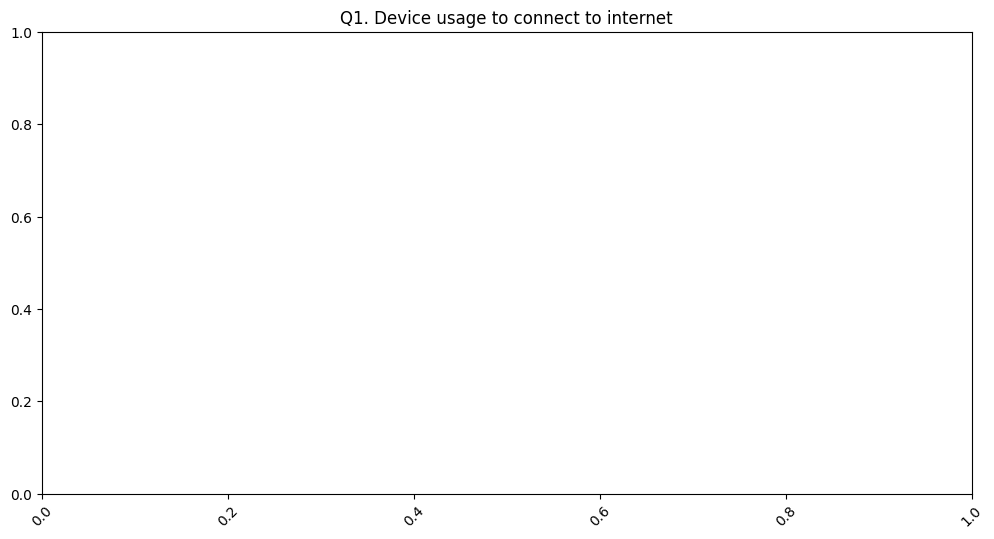

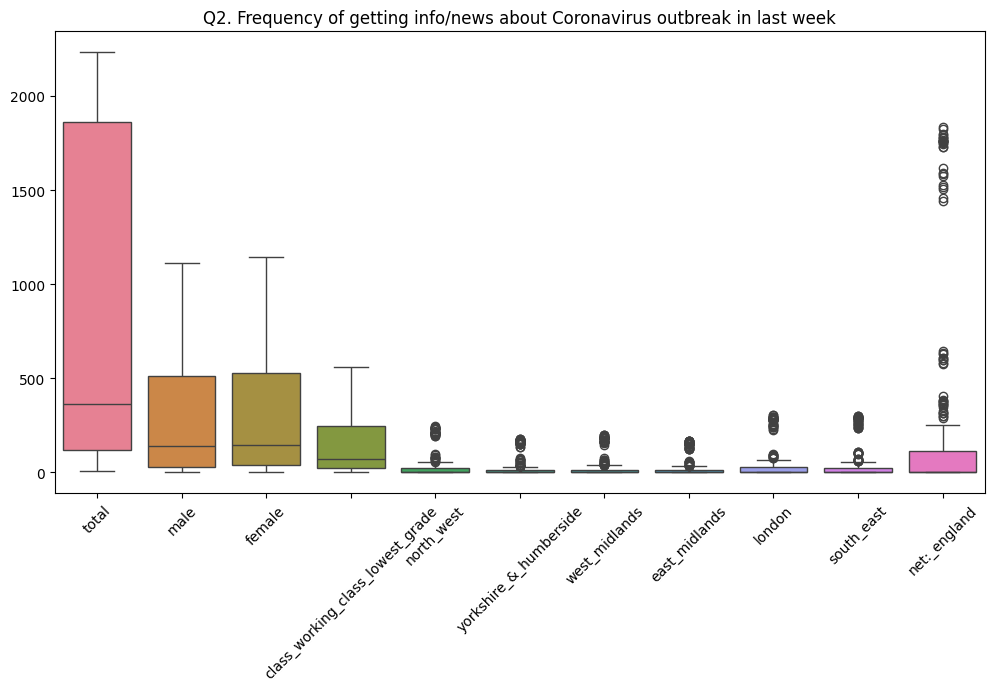

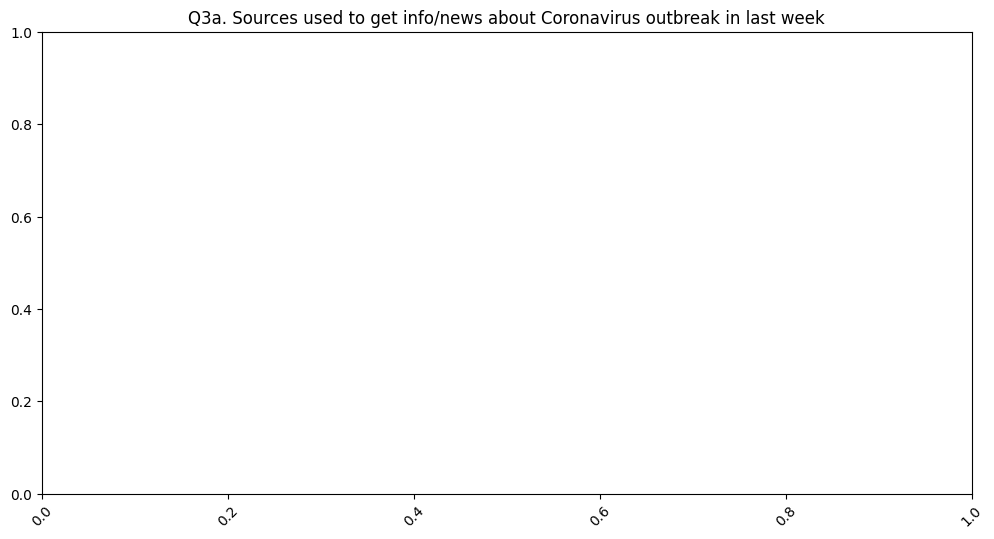

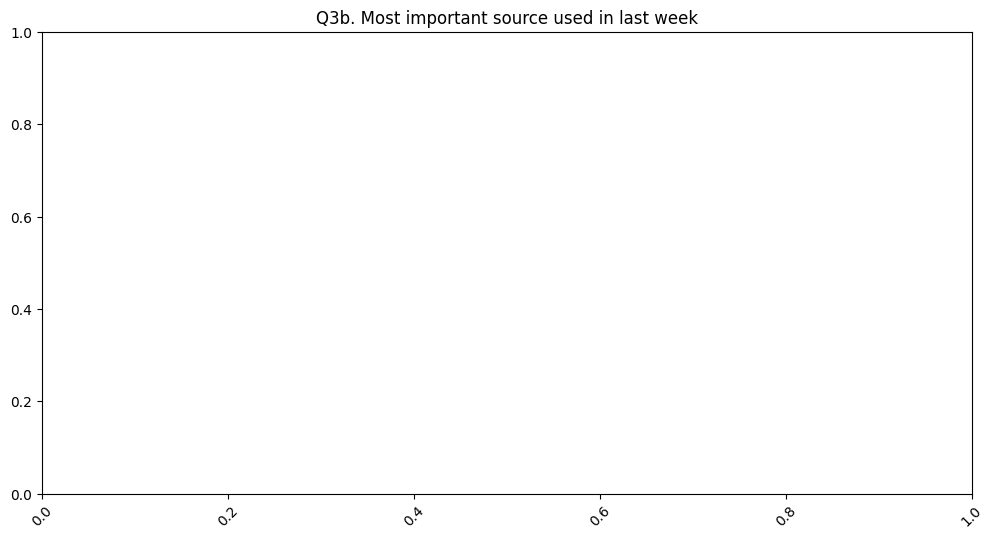

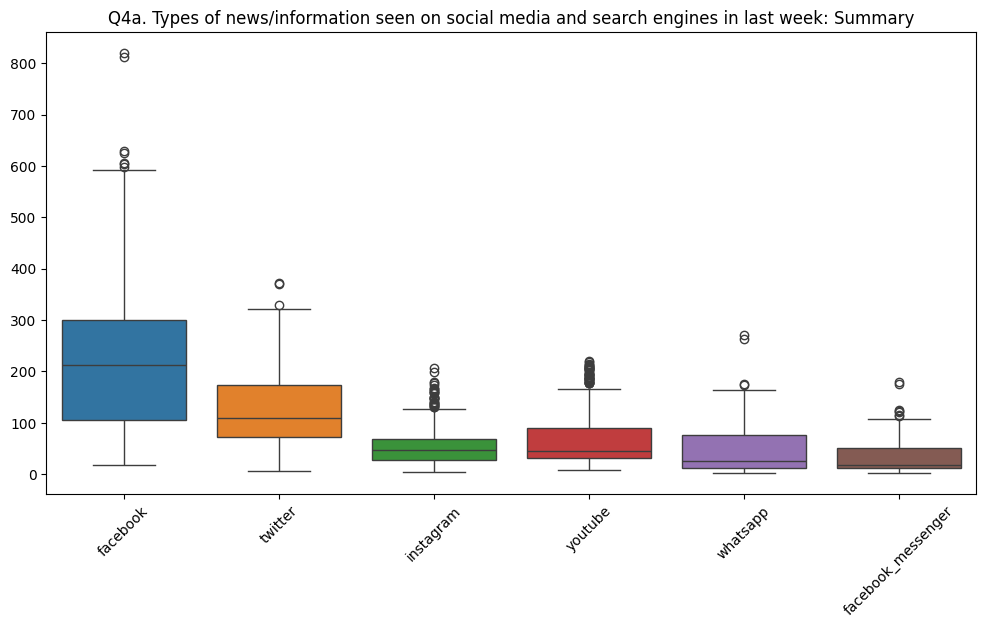

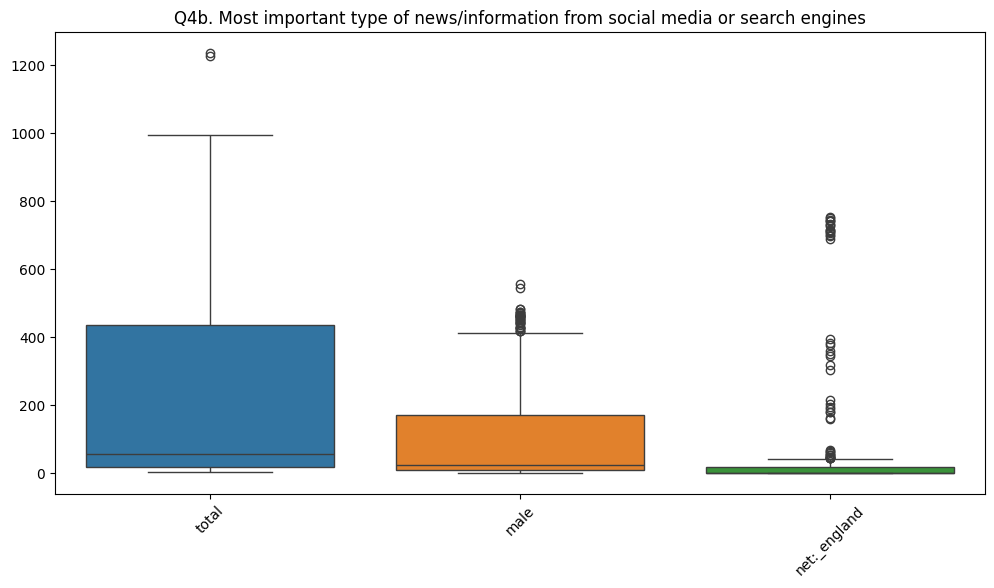

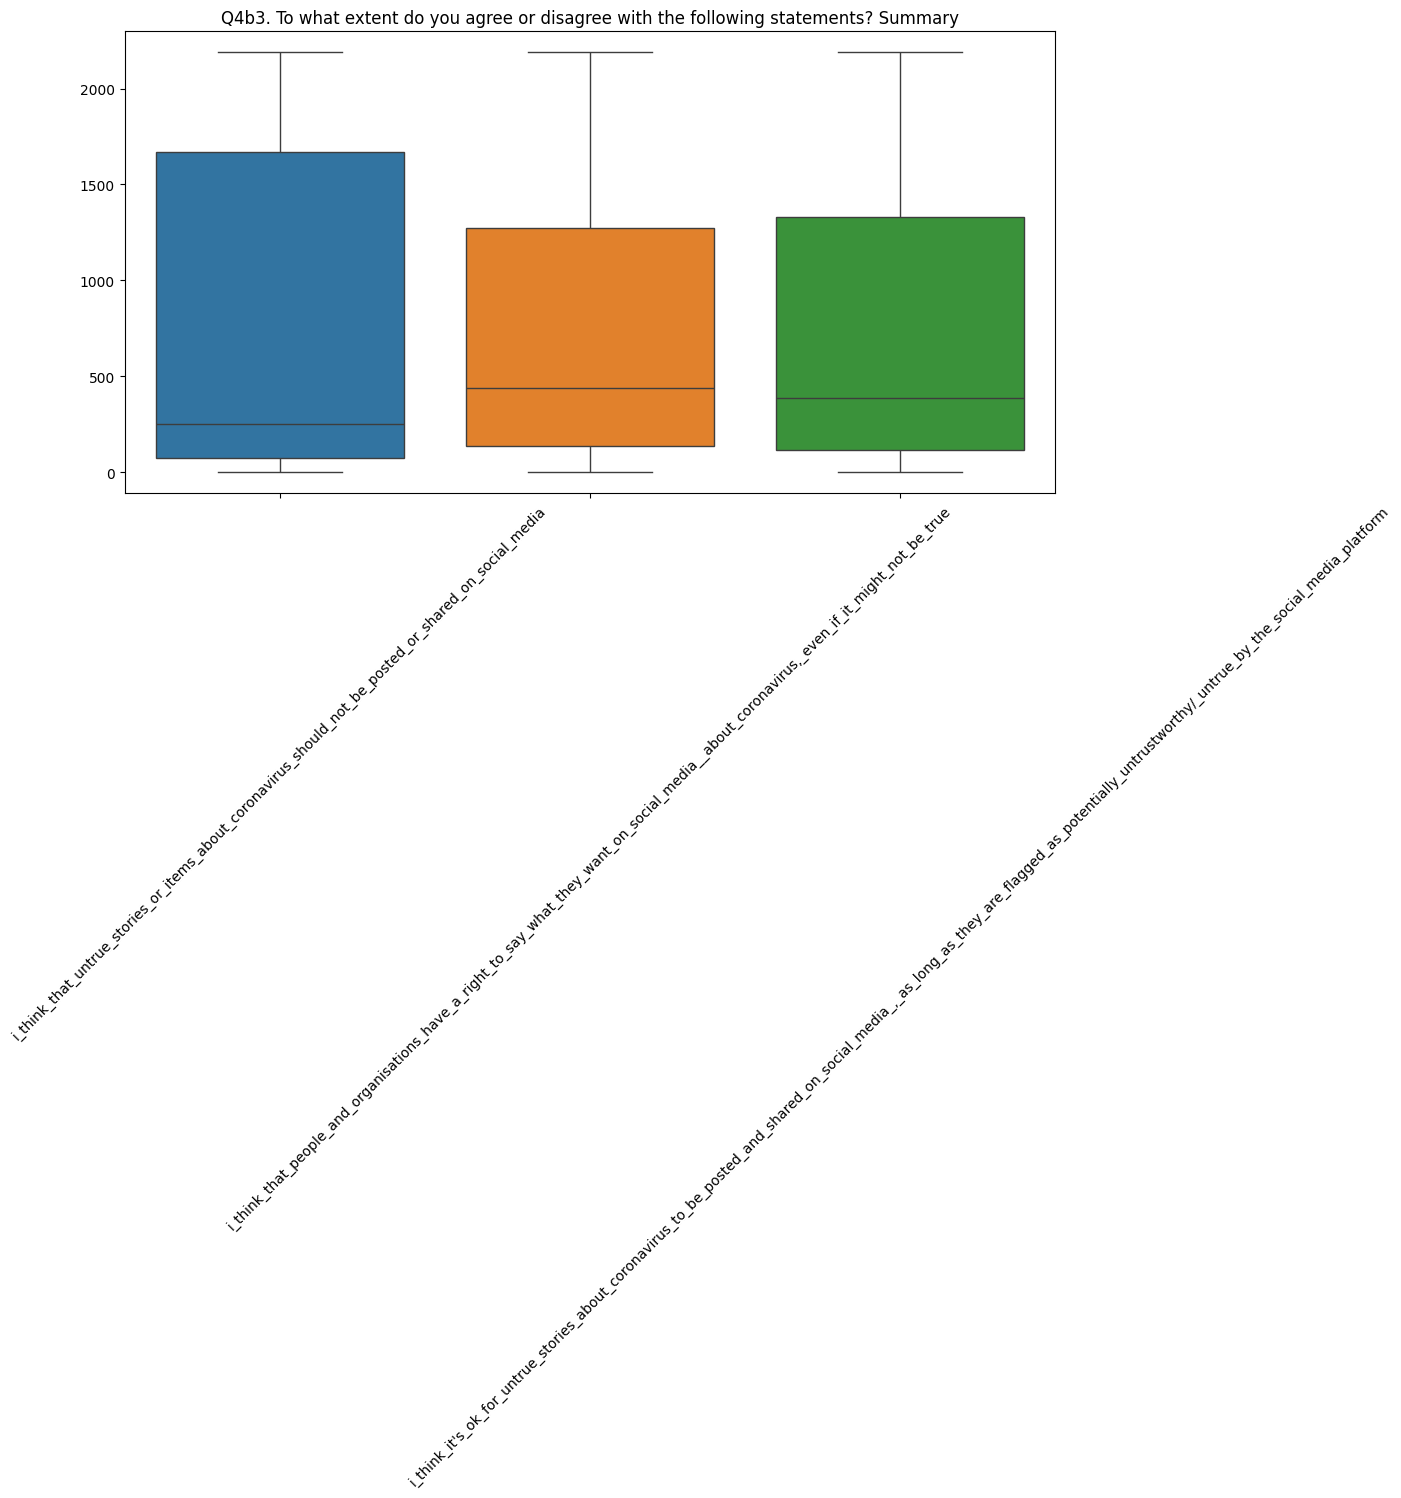

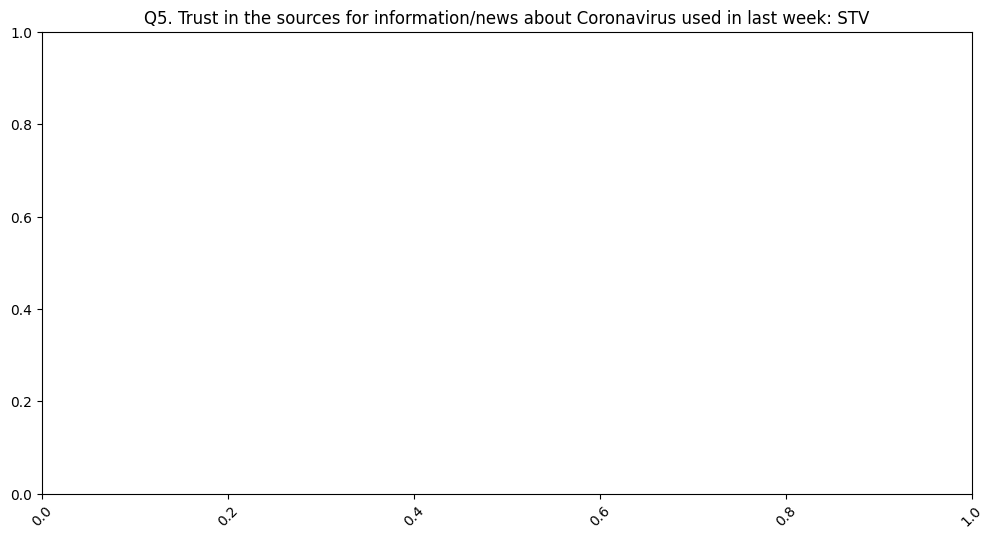

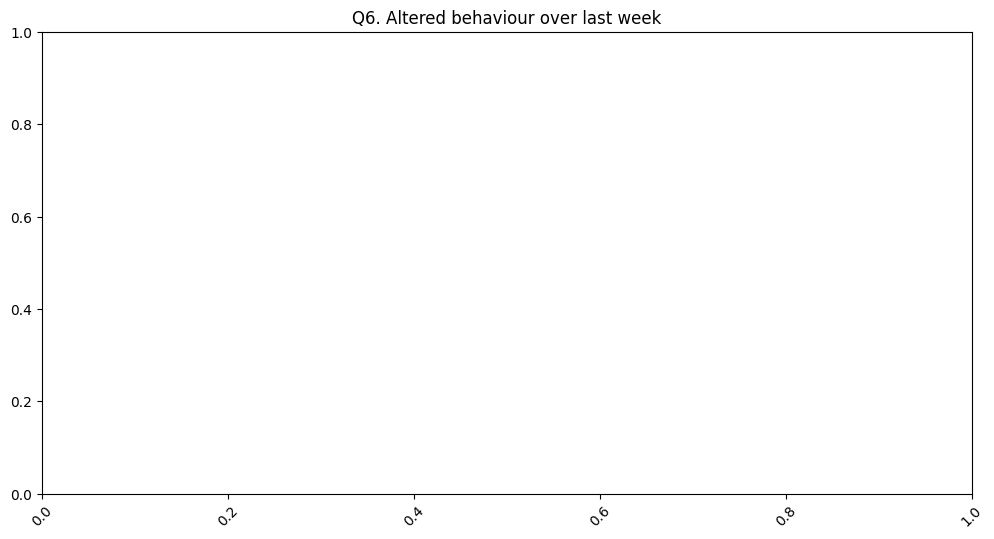

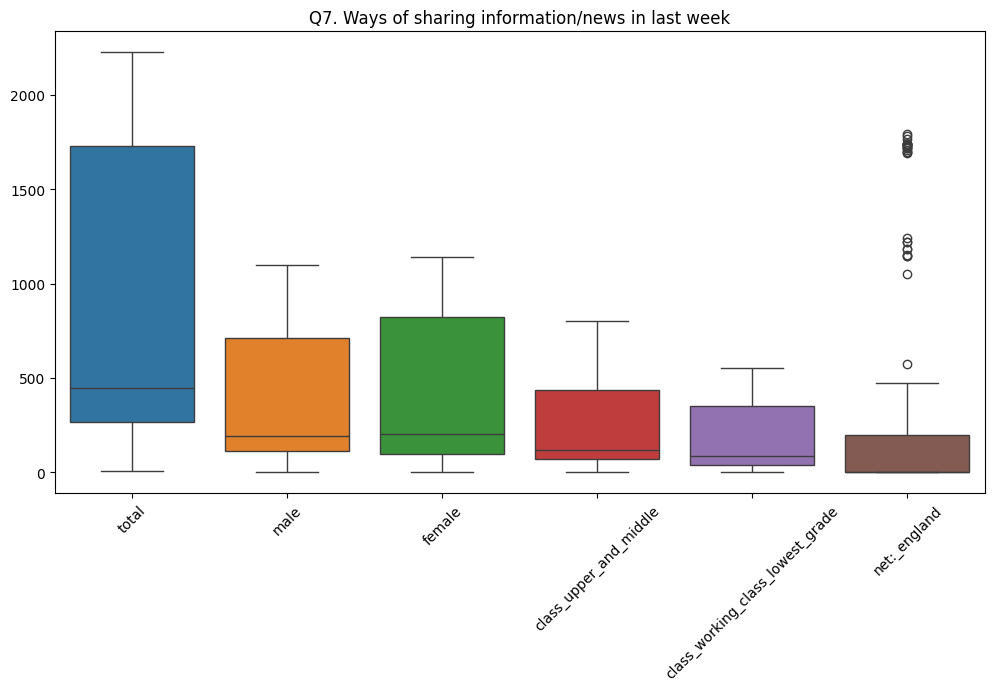

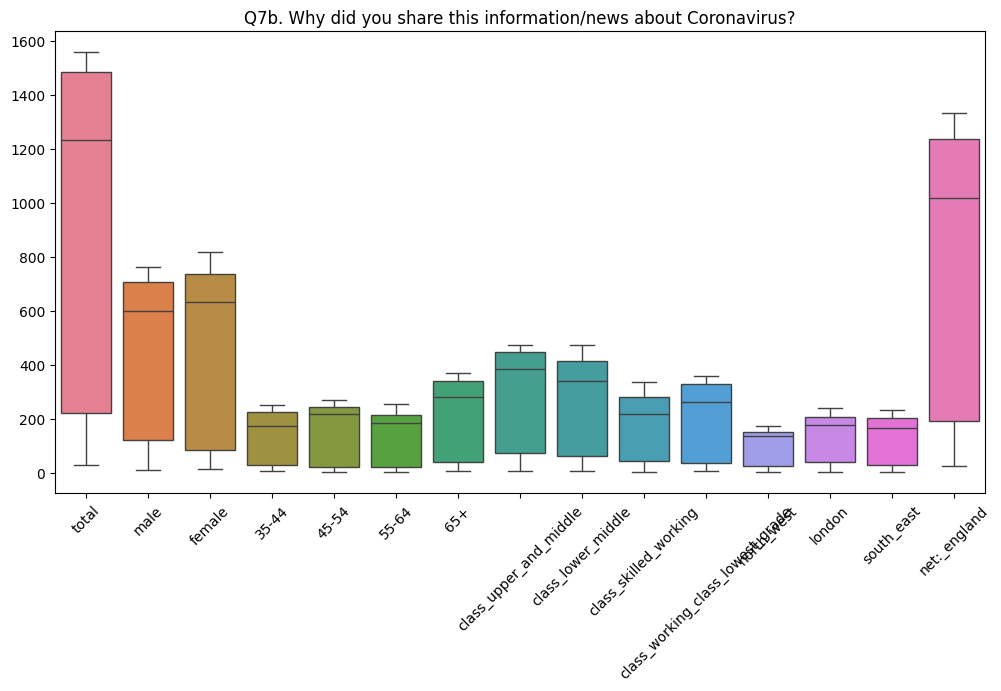

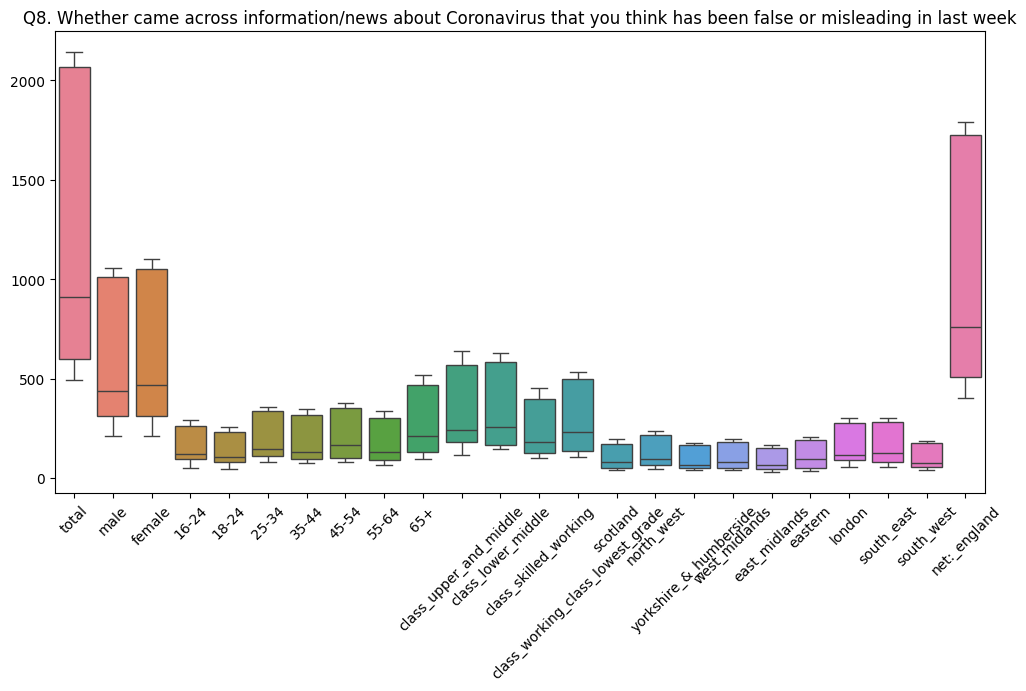

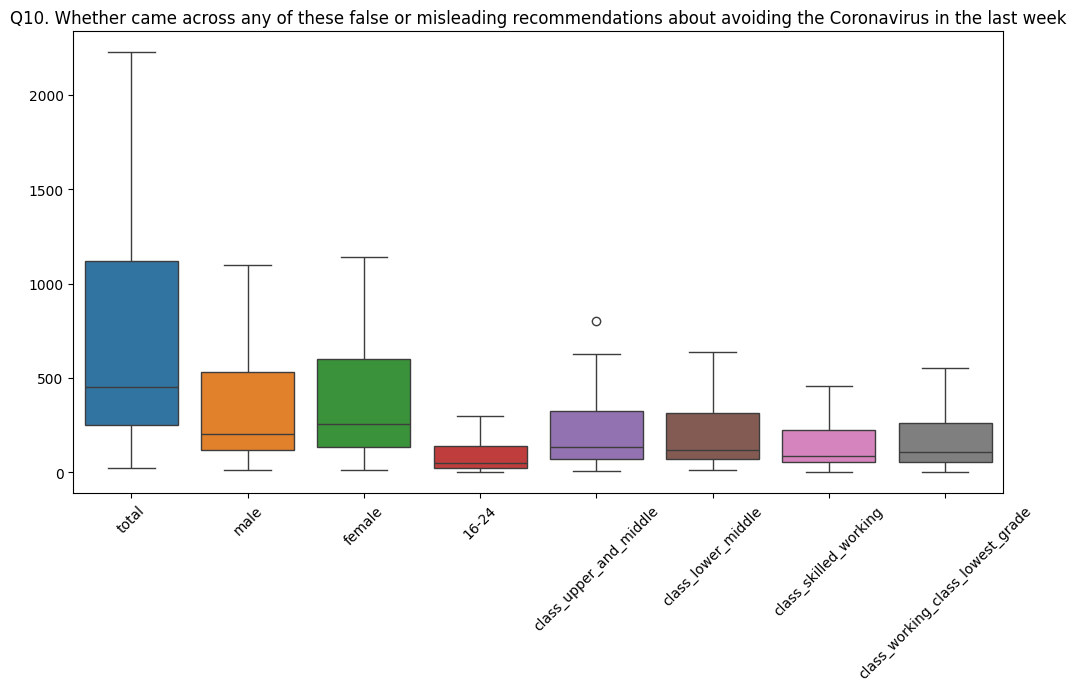

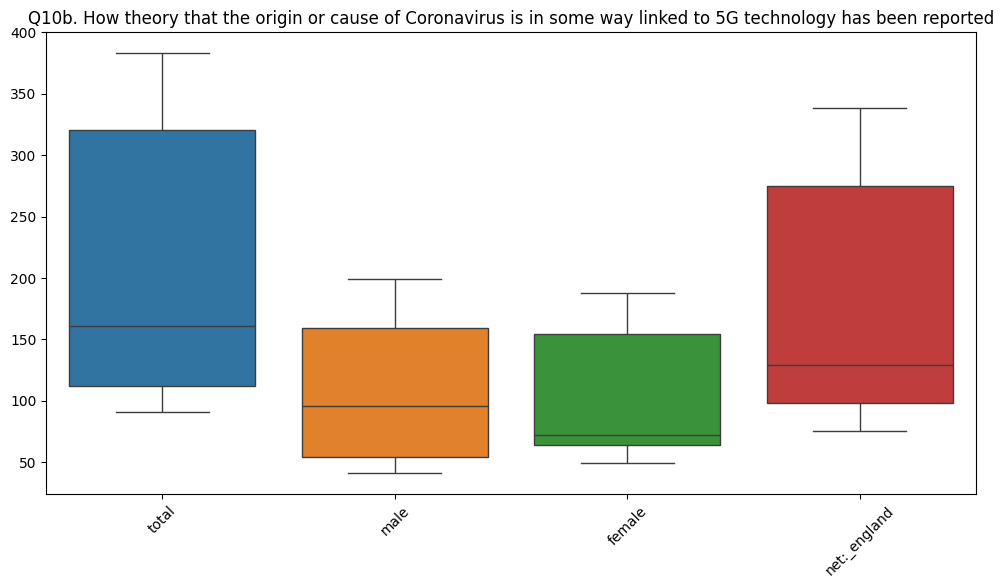

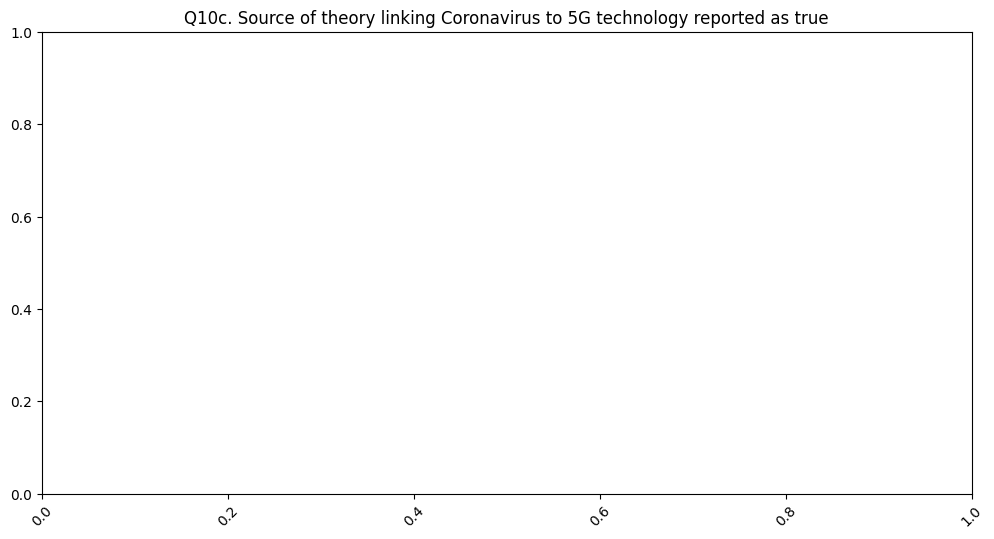

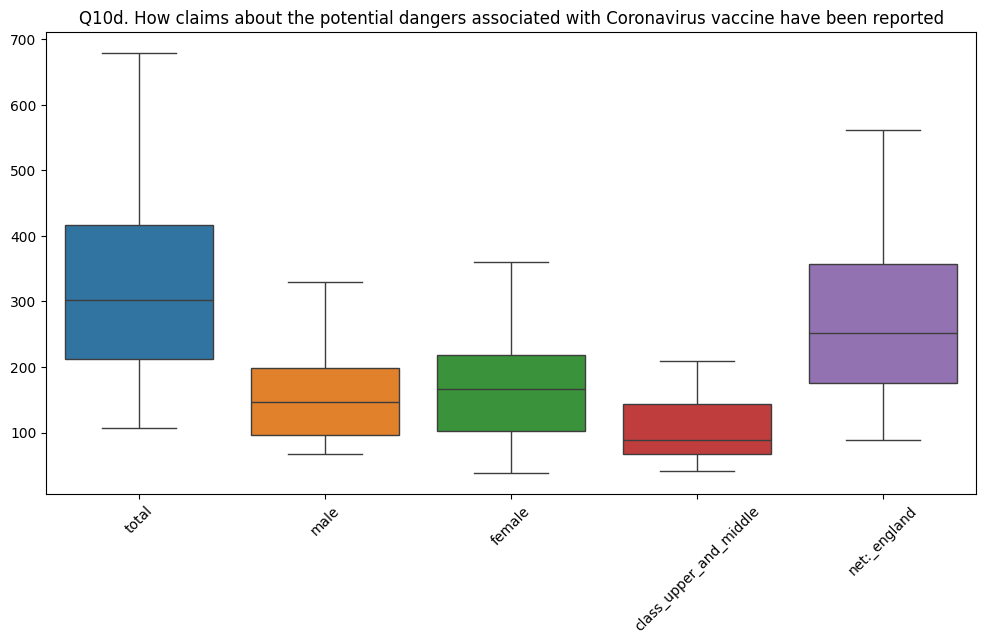

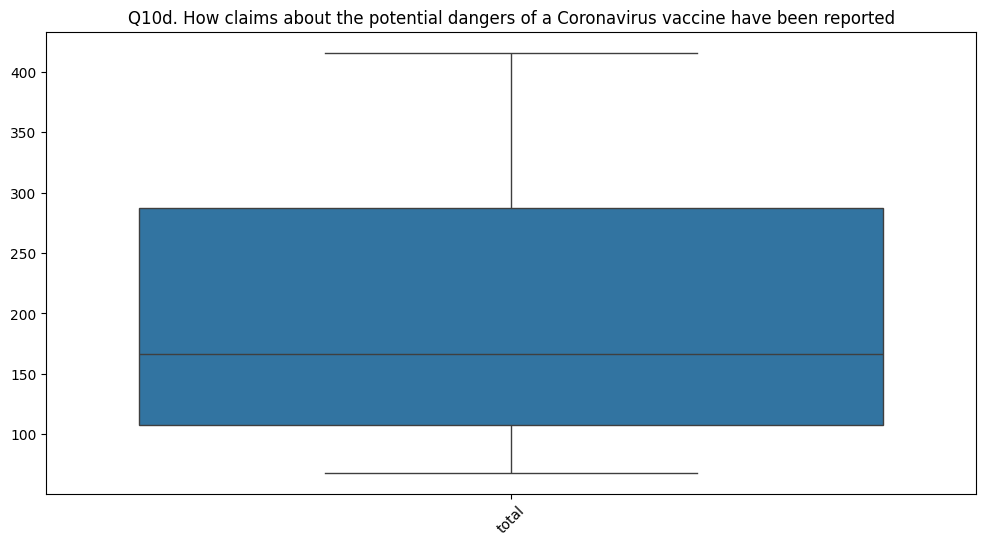

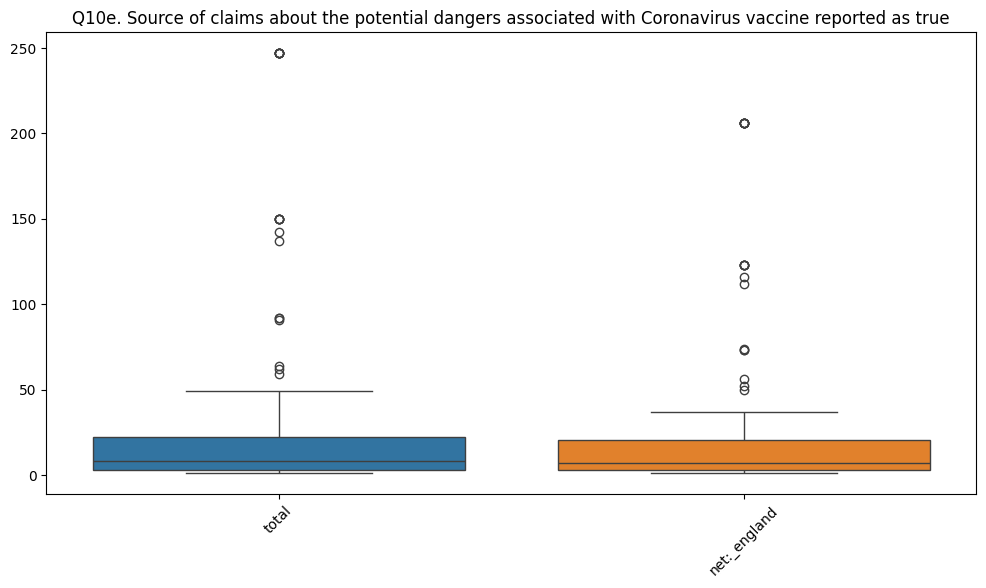

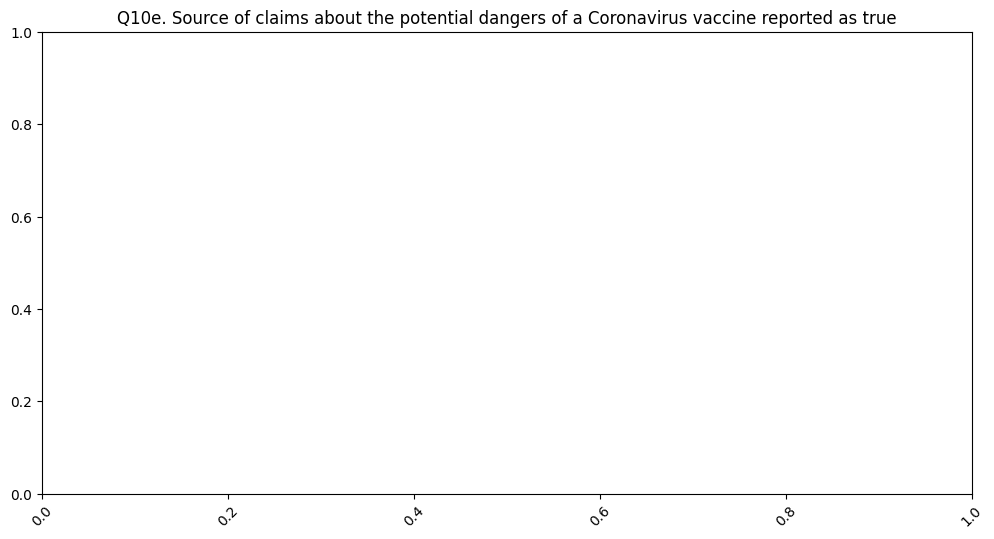

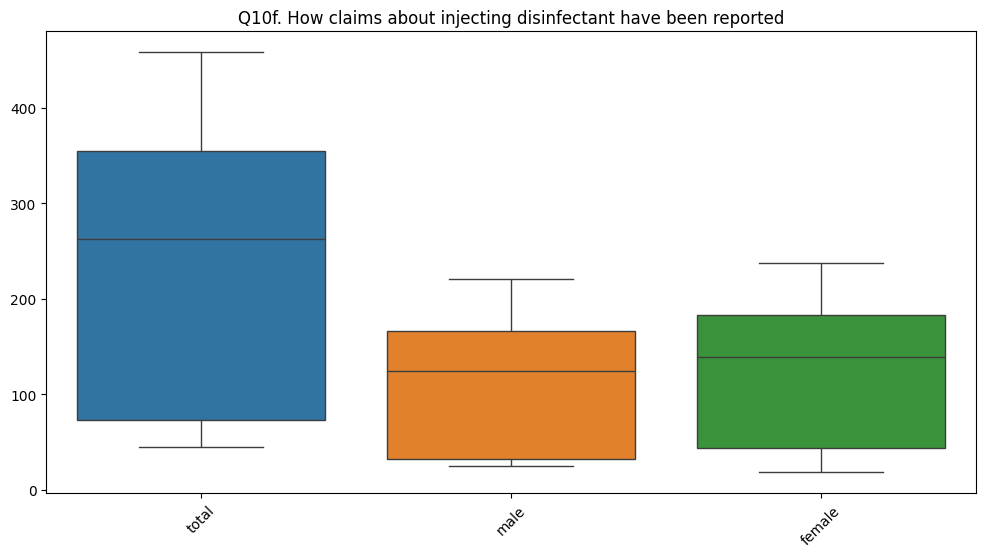

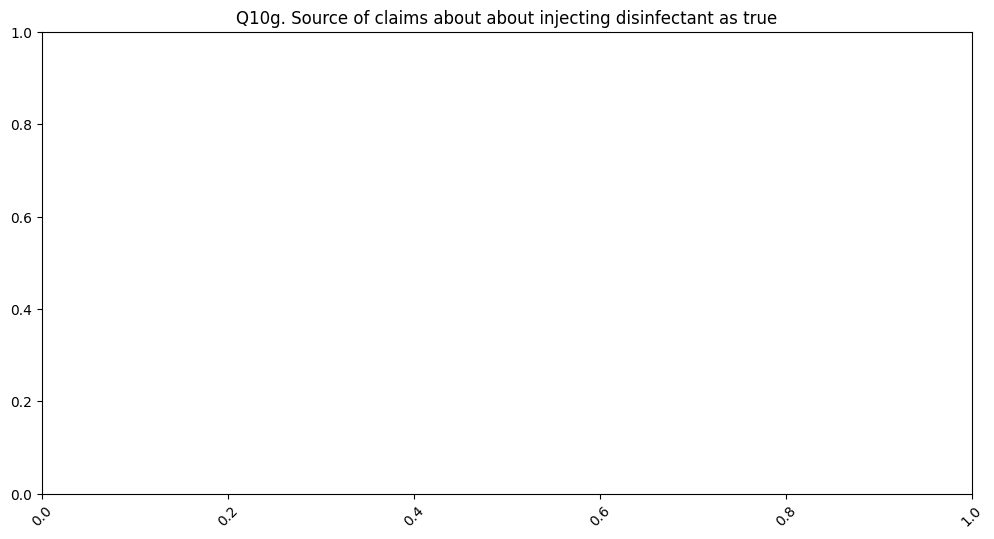

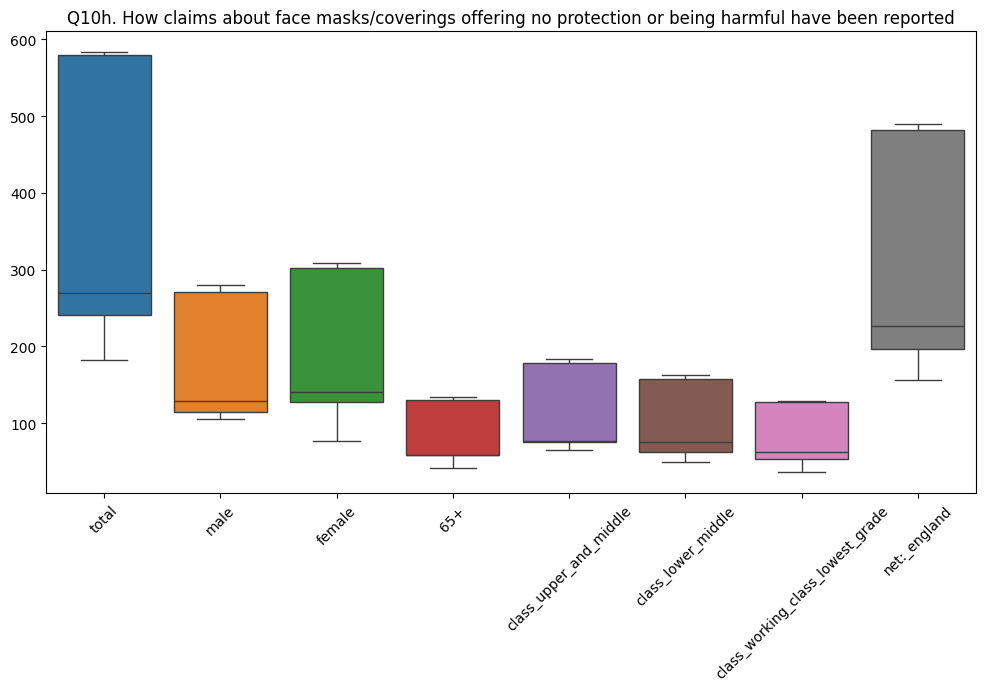

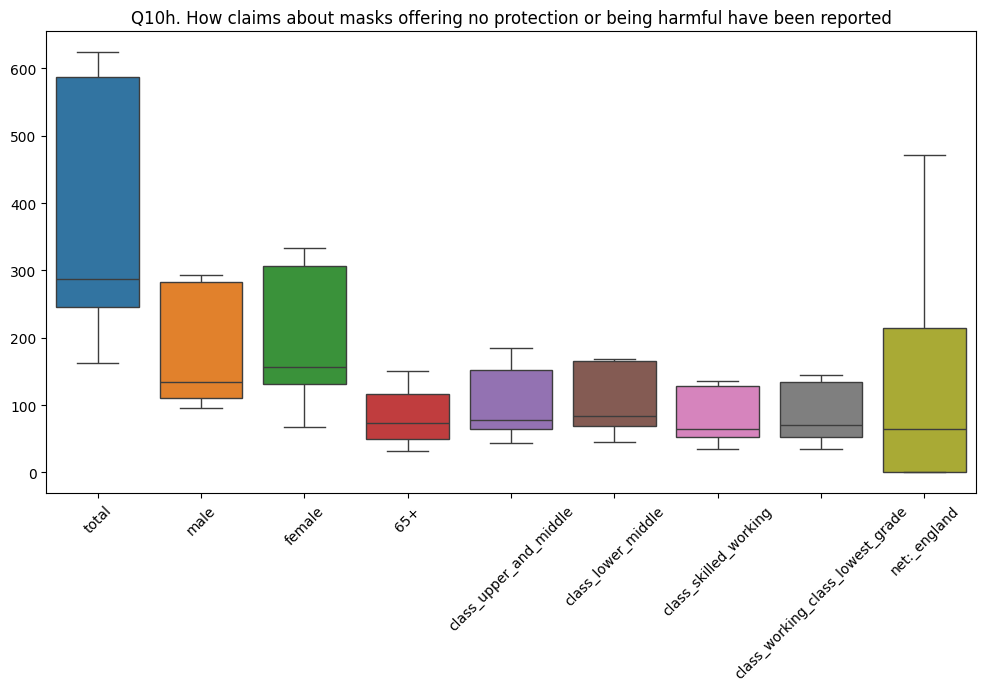

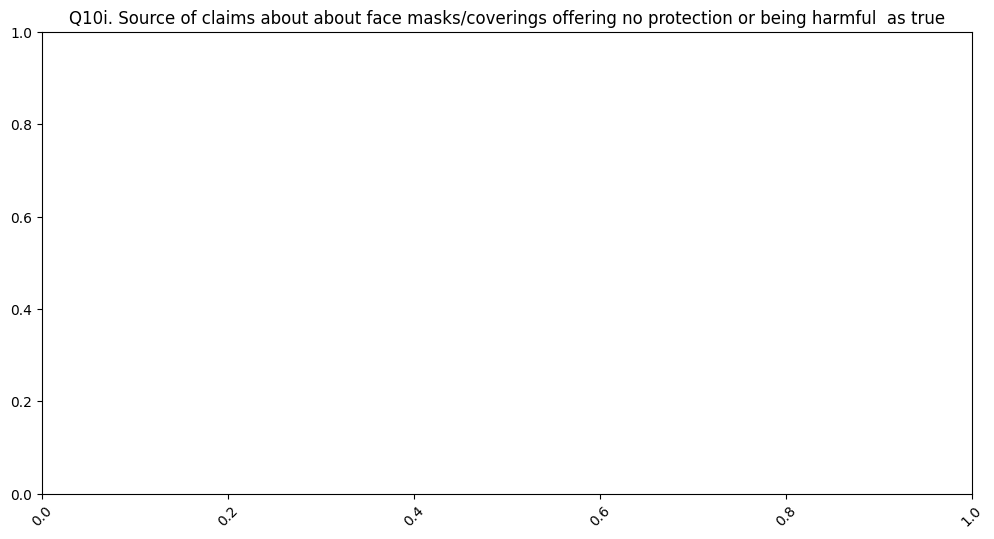

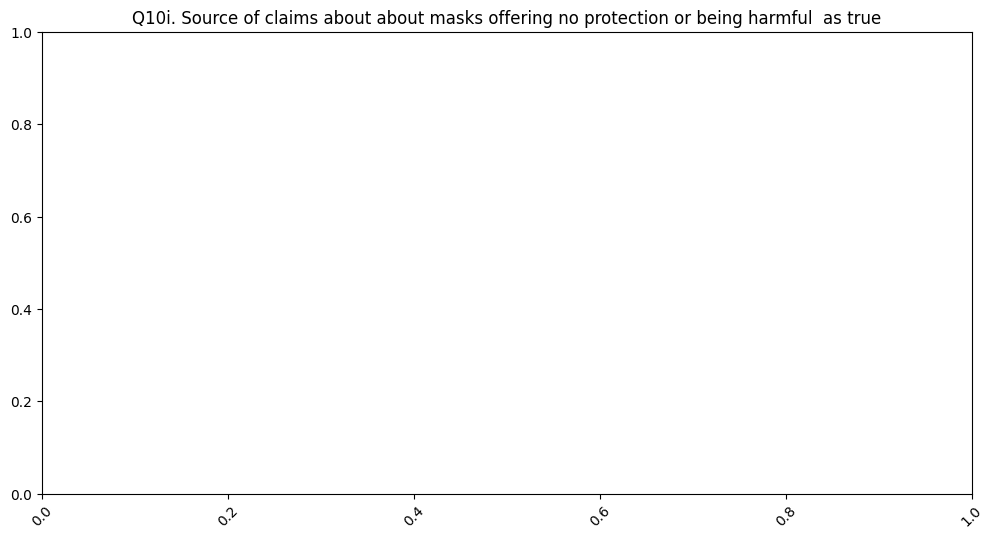

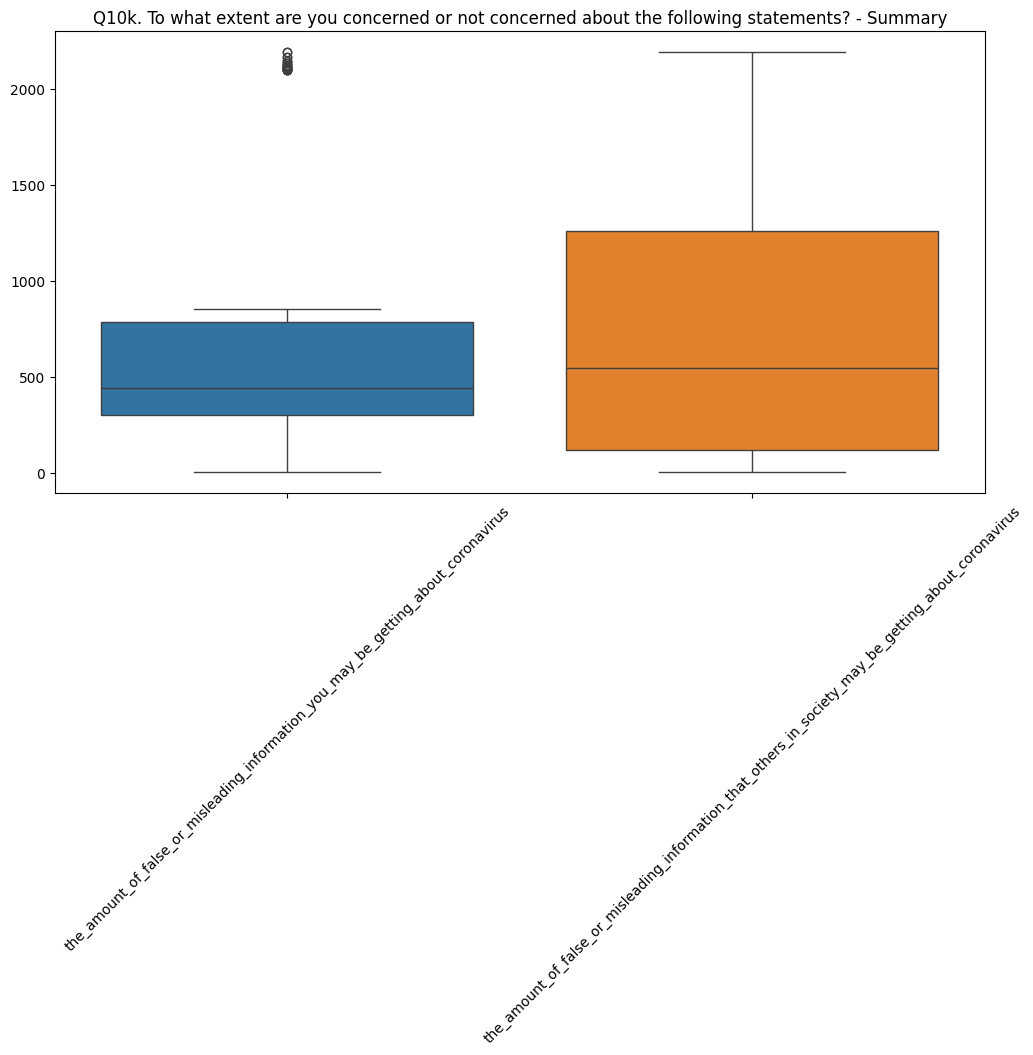

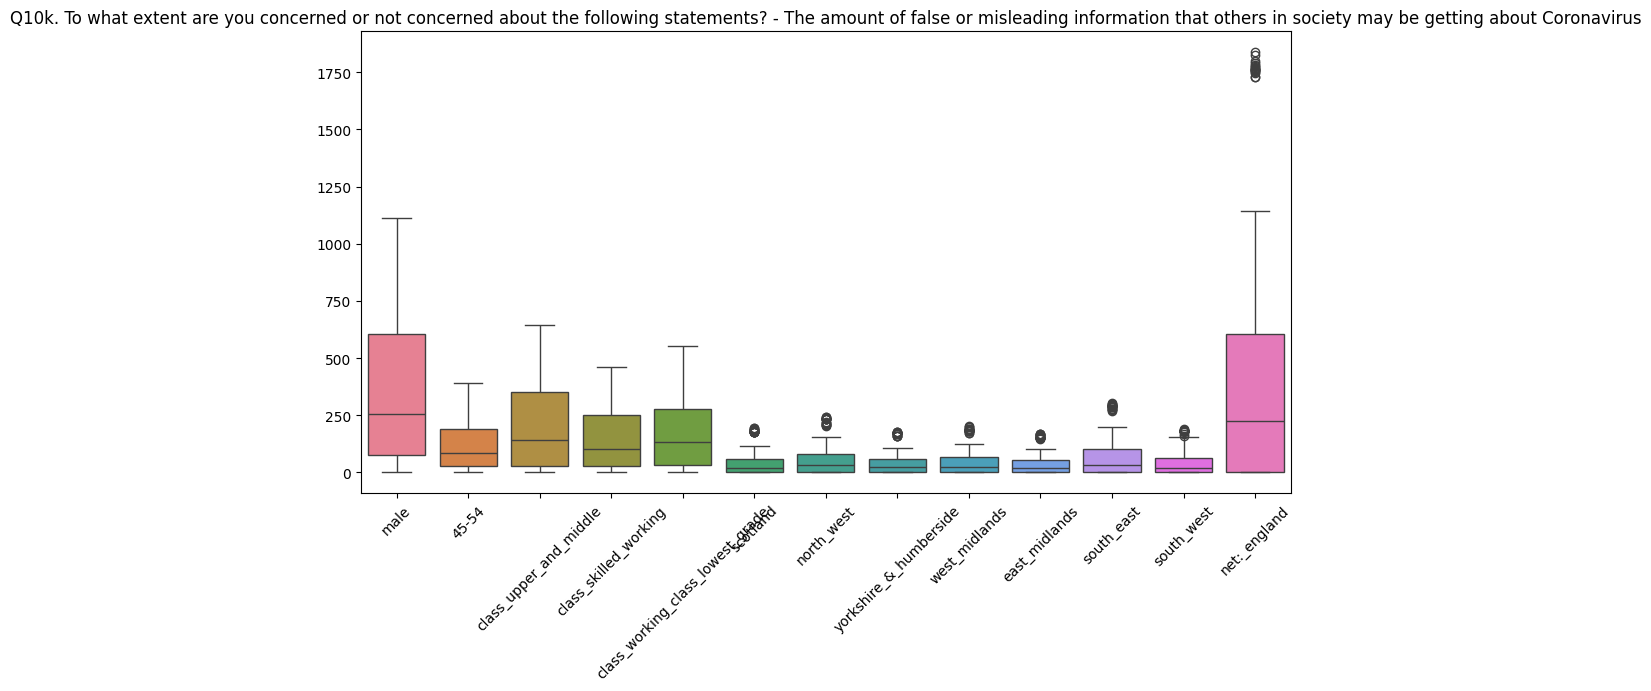

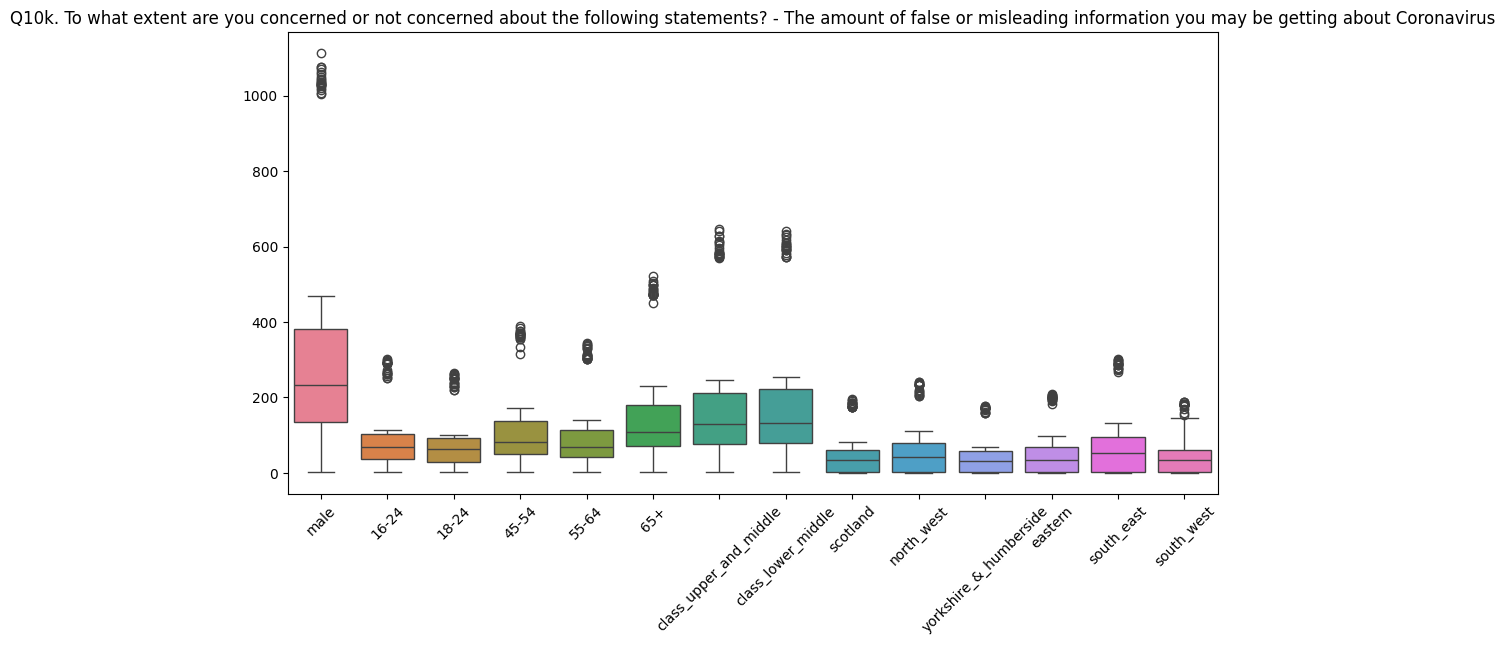

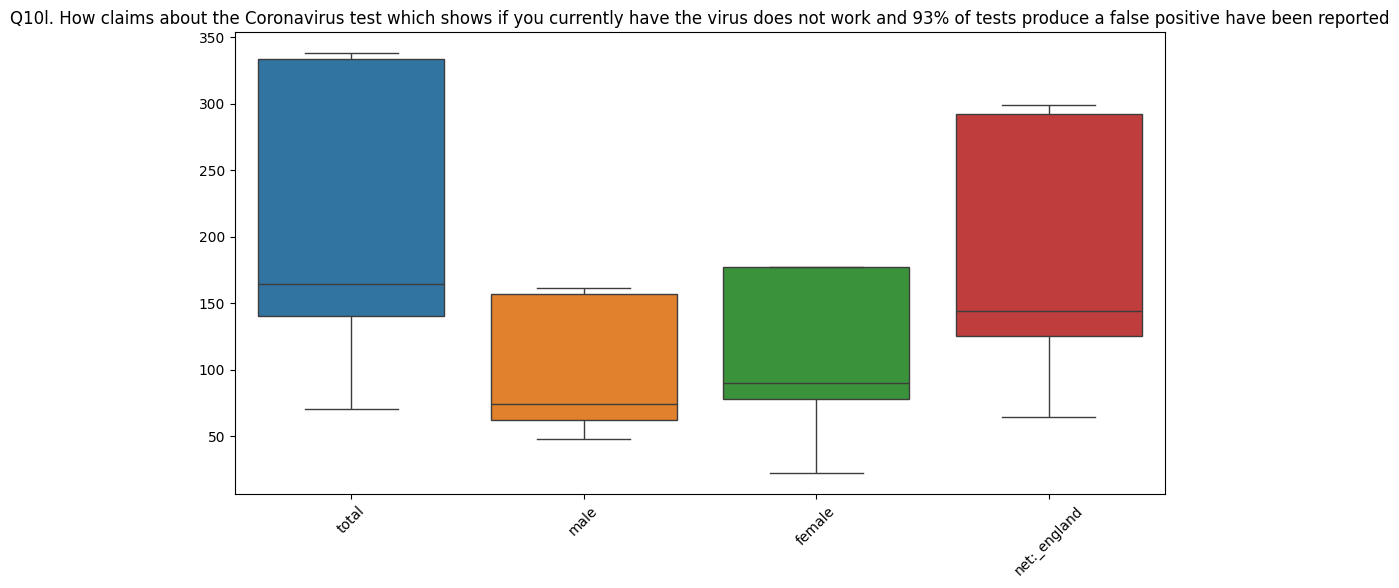

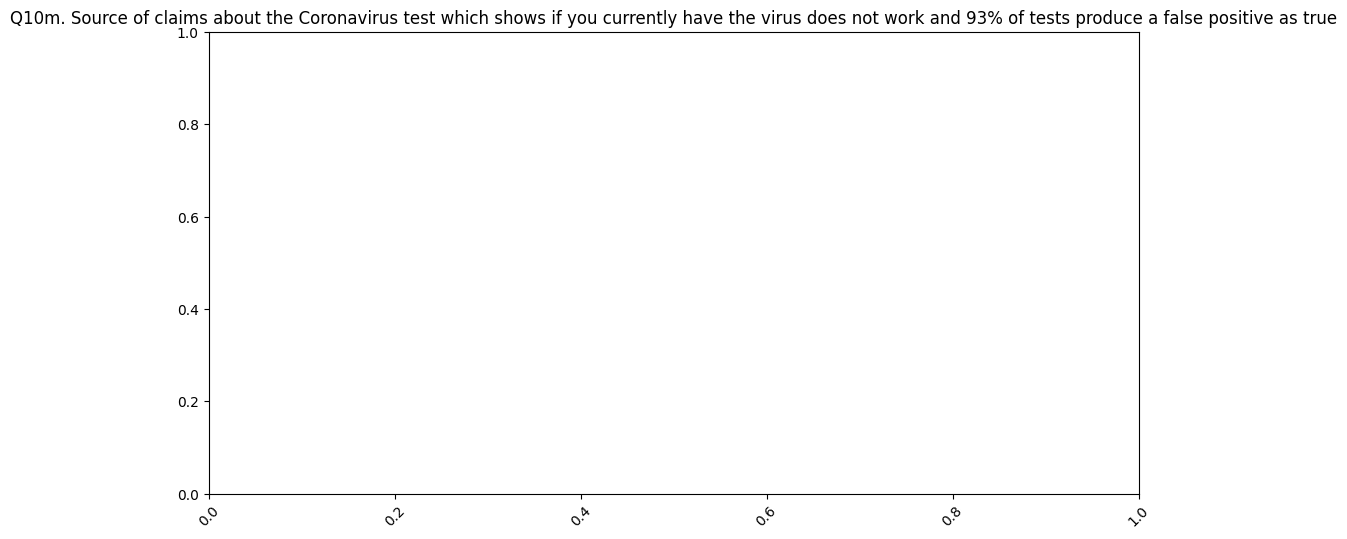

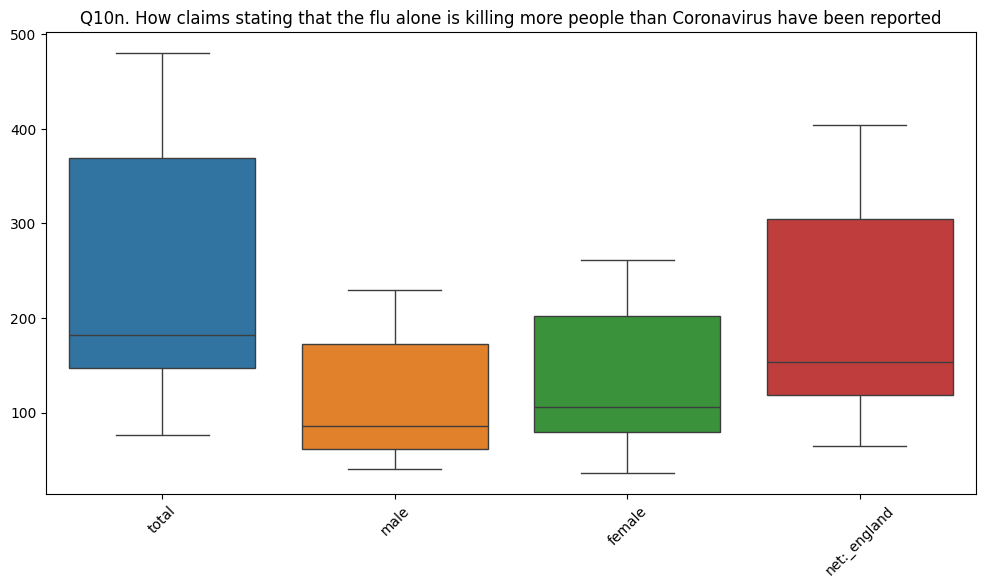

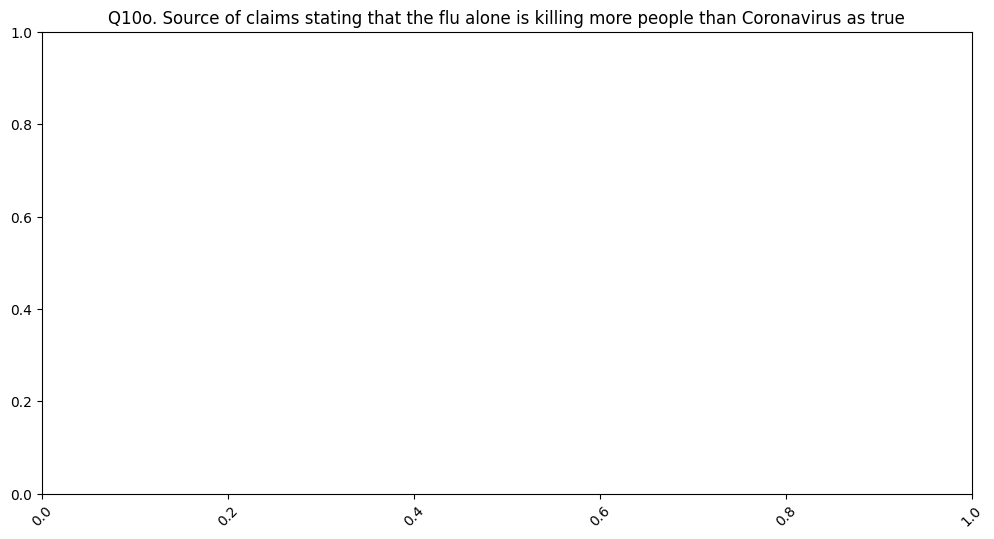

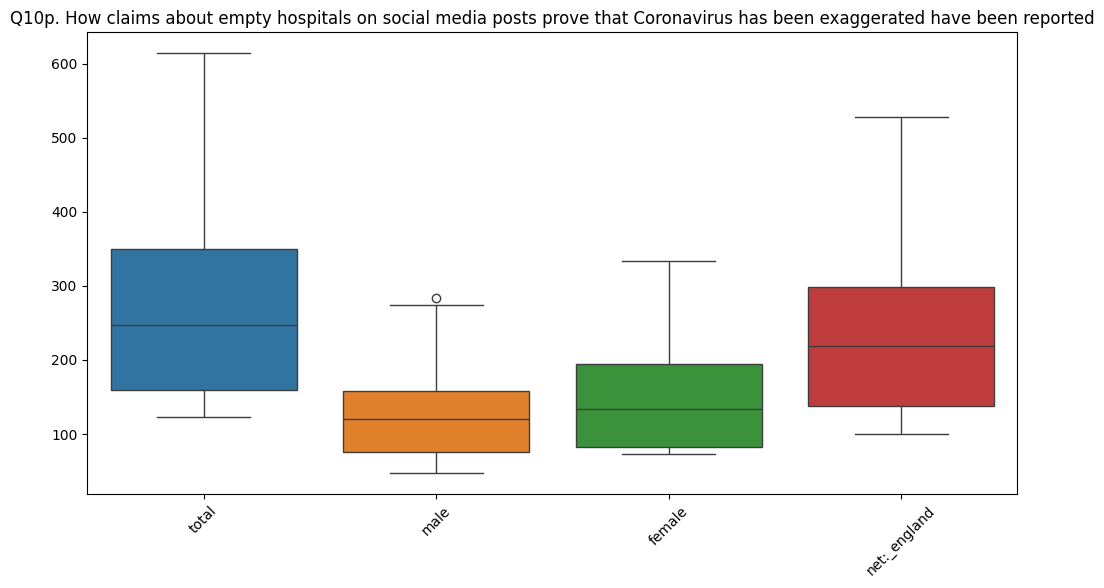

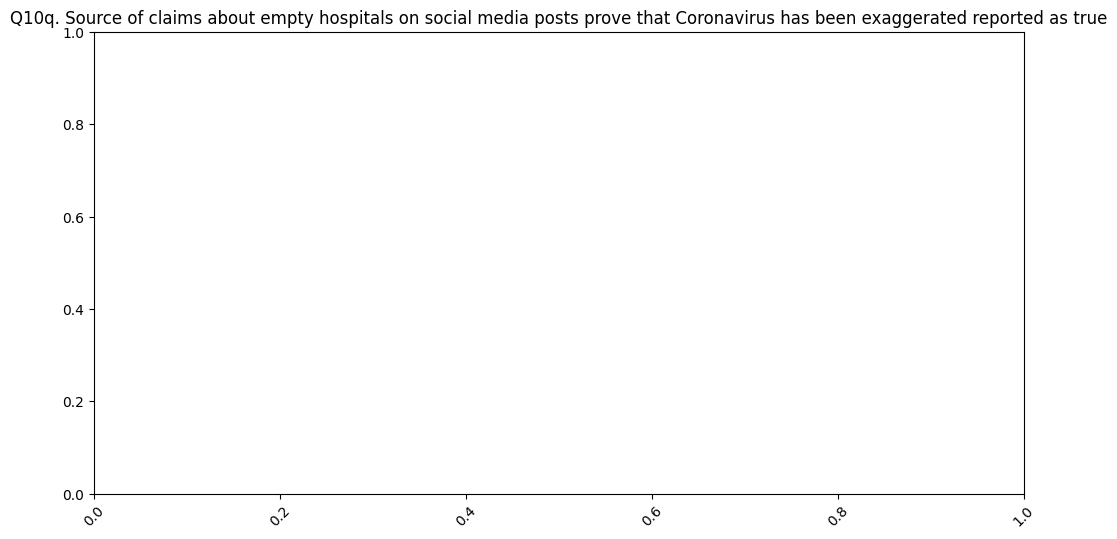

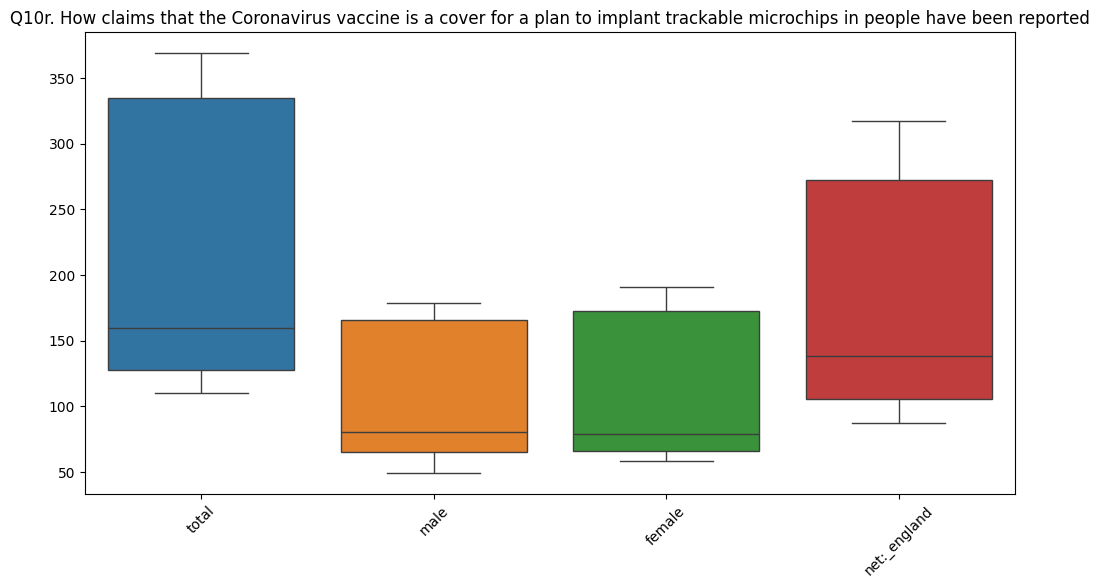

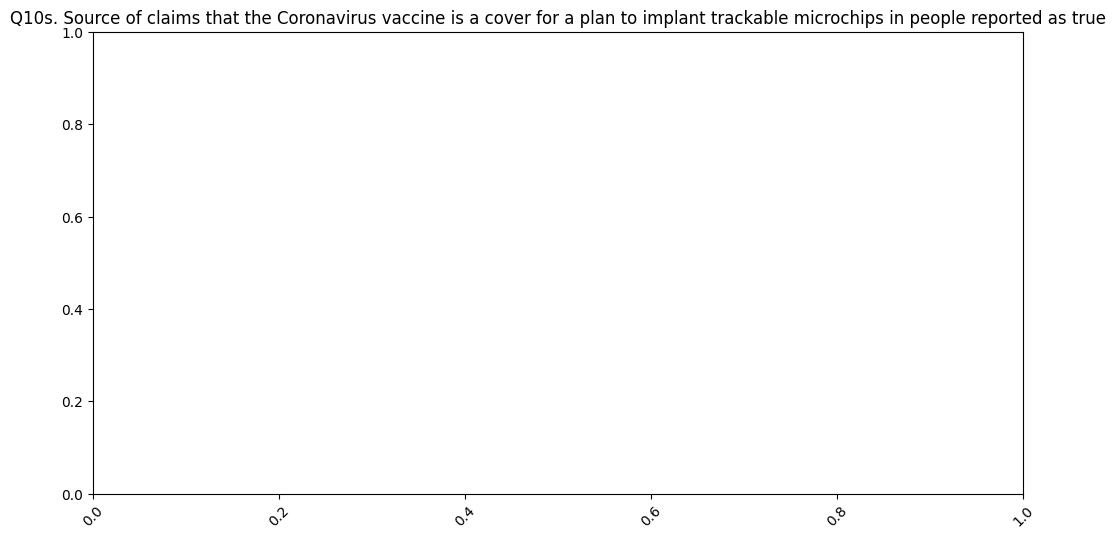

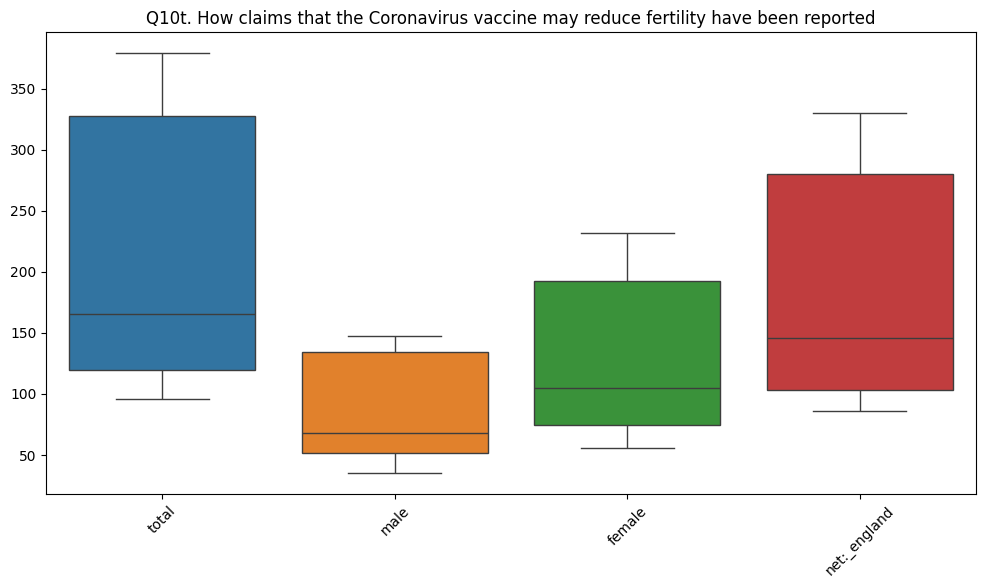

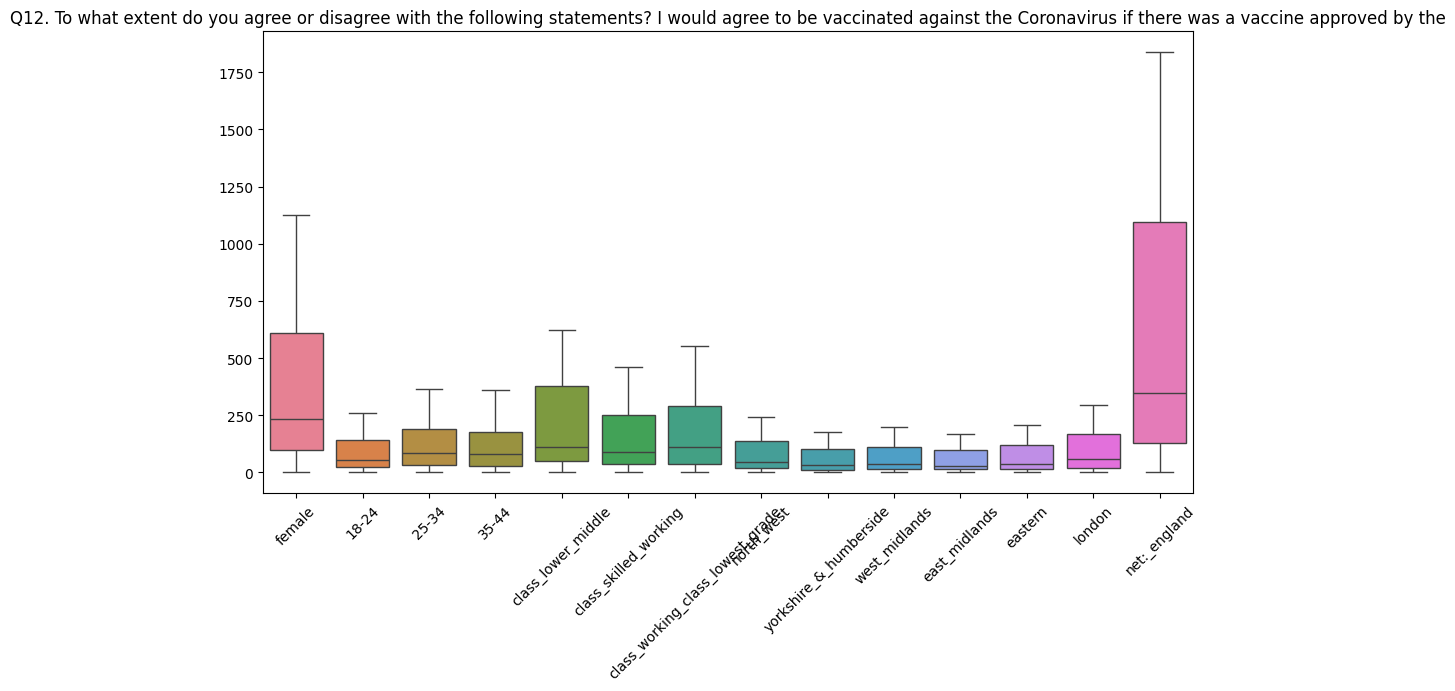

In [27]:
for dataframe in ofcom_dataframes.values():    
    numerical_columns = dataframe.select_dtypes(include=['number']).columns

    plt.figure(figsize=(12, 6))

    sns.boxplot(data=dataframe[numerical_columns])

    plt.title(dataframe.question[0])
    plt.xticks(rotation=45)

    plt.show()

### The majority of the dataframes do not have outliers. In those that do the outliers predominately lie in the 


## 8. Checking for Inconsistencies
### Finally, I will clean up the text for the question columns to formatting them with lower case and _ for space, I will also drop the table number column

In [28]:
for key, dataframe in ofcom_dataframes.items():
    ofcom_dataframes[key] = ofcom_dataframes[key].drop('table', axis=1)

In [29]:
def format_question(question):
    question = question.split('. ')[1:][0].lower().replace(' ', '_')
    return question

In [30]:
for key, dataframe in ofcom_dataframes.items():
    dataframe['question'] = dataframe['question'].apply(format_question)

## 10. Saving to file:

In [31]:
for key, dataframe in ofcom_dataframes.items():
    filename = '_'.join(key.split('_')[1:]) + '_cleaned.csv'
    dataframe = dataframe.sort_values(by='start_date', ascending=True)
    dataframe.to_csv(f"2_cleaned_files/ofcom_survey_data/{filename}", index=False)